#Supervised Learning - BERT Model training and implementation#

Welcome to our BERT Model training and implementation workbook. We explore the training and testing of our BERT and Distilled Models on stocks dataset here

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [1]:
!pip install yellowbrick
!pip install textblob
!pip install wordcloud
!pip install vaderSentiment
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [2]:
#from google.colab import drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import folium
import math
import numpy as np
import re
import seaborn as sns
#from google.colab import files
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
pd.set_option('display.max_colwidth', None)
from tqdm import tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
## All purpose
import pandas as pd
import numpy as np
from google.colab import drive


## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
#from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
## Deeplearning/ML
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, fbeta_score, jaccard_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, PrecisionRecallCurve
#from sklearn.metrics import plot_confusion_matrix

In [6]:
drive.mount("/content/drive")
path="/content/drive/MyDrive/output3.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

Mounted at /content/drive


,Body,Created At,Entities,Number of Likes,User,stock,date,time
0,"dollar_spy pass the bill, billy! let us pump the market. dollar_tsla dollar_aapl",2023-09-30 23:45:29,Bullish,9.0,7260793,AAPL,2023-09-30,23:45:29
1,dollar_aapl dollar_amd dollar_f dollar_spy dollar_aal,2023-09-30 23:28:57,0,0.0,809641,AAPL,2023-09-30,23:28:57
2,dollar_aapl i think its the new titanium case. what you think?,2023-09-30 23:25:13,0,1.0,1061207,AAPL,2023-09-30,23:25:13
3,dollar_spy passed the bill? mother of pump for next week market? dollar_aapl dollar_tsla,2023-09-30 23:21:04,Bullish,12.0,7260793,AAPL,2023-09-30,23:21:04
4,dollar_aapl gained 39 new watchers today! - check for trend data,2023-09-30 23:15:18,Bullish,0.0,6294398,AAPL,2023-09-30,23:15:18


In [8]:
# Define date range to remove
start_date = '2023-07-01'
end_date = '2023-09-30'


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert strings to datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Remove rows within the specified date range
df = df[~((df['date'] >= start_date) & (df['date'] <= end_date))]

df.tail()

,Body,Created At,Entities,Number of Likes,User,stock,date,time
2612161,"dollar_c ok, seriously... we&;re all here for the hope of an end-of-tax-loss-selling bounce. but who has an idea for a good long-term banking stock? bns? ifs?",2022-01-01 16:34:33,Bullish,4.0,1209599,C,2022-01-01,16:34:33
2612162,q4 financial services earnings on deck next week dollar_jpmdollar_wfcdollar_blkdollar_c,2022-01-01 03:46:53,0,2.0,3872468,C,2022-01-01,03:46:53
2612163,"dollar_c volume up by +185.91 % | 12,526,146 vs 4,381,183",2022-01-01 03:36:41,0,1.0,1553598,C,2022-01-01,03:36:41
2612164,dollar_c expecting to reach between 65 to 70 before the earnings,2022-01-01 00:50:13,Bullish,6.0,1648531,C,2022-01-01,00:50:13
2612165,"unusual option alert on dollar_c $2,900,000 put block traded with $60.0 strike expiring on 2023-01-20. via",2022-01-01 00:09:41,0,0.0,5286511,C,2022-01-01,00:09:41


In [14]:

### Test to see if data during period 01 Jul to 30 Sep has been removed
column_name='date'

### Will show up as true if its in df
df[(df[column_name] >= start_date) & (df[column_name] <= end_date)].any()

Body               False
Created At         False
Entities           False
Number of Likes    False
User               False
stock              False
date               False
time               False
dtype: bool

In [15]:
df.isna().sum()

Body               55
Created At          0
Entities            0
Number of Likes     0
User                0
stock               0
date                0
time                0
dtype: int64

In [16]:
df2 = df.copy()

In [17]:
## Creating sentimental polarity function for polarity score
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments - words
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [18]:
## Applying Compund score
polarity_scores = df2["Body"].astype("str").apply(compound_score)
df2["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df2["Sentiment"] = df2["Sentiment_Score"].apply(sentiment)

In [19]:
df2.tail()

,Body,Created At,Entities,Number of Likes,User,stock,date,time,Sentiment_Score,Sentiment
2612161,"dollar_c ok, seriously... we&;re all here for the hope of an end-of-tax-loss-selling bounce. but who has an idea for a good long-term banking stock? bns? ifs?",2022-01-01 16:34:33,Bullish,4.0,1209599,C,2022-01-01,16:34:33,0.7176,Positive
2612162,q4 financial services earnings on deck next week dollar_jpmdollar_wfcdollar_blkdollar_c,2022-01-01 03:46:53,0,2.0,3872468,C,2022-01-01,03:46:53,0.0000,Neutral
2612163,"dollar_c volume up by +185.91 % | 12,526,146 vs 4,381,183",2022-01-01 03:36:41,0,1.0,1553598,C,2022-01-01,03:36:41,0.0000,Neutral
2612164,dollar_c expecting to reach between 65 to 70 before the earnings,2022-01-01 00:50:13,Bullish,6.0,1648531,C,2022-01-01,00:50:13,0.0258,Neutral
2612165,"unusual option alert on dollar_c $2,900,000 put block traded with $60.0 strike expiring on 2023-01-20. via",2022-01-01 00:09:41,0,0.0,5286511,C,2022-01-01,00:09:41,-0.2960,Neutral


In [20]:
#df2.to_csv("Body_with_Sentiment_Score")

To align the sentiment scores with our supervised learning model, we implement the following normalization function to bin the figures into 0.25 intervals. Its for us to perform data discovery, to see how many line items we have in each bin, and how skewed the data is.  

In [21]:
def normalize_score(original_score):
    """Normalize sentiment score from range [-1, 1] to [0, 5]."""
    #### this formula is to put it into a norminal scale
    normalized_score = ((original_score + 1) / 2) * 5
    ### following rounding up is to bin them into 0.25ssss
    return round(normalized_score* 4) / 4 #round(normalized_score* 2) / 2

df2['normalized_Sentiment_score'] = df2['Sentiment_Score'].apply(normalize_score)

In [22]:
df2.isna().sum()

Body                          55
Created At                     0
Entities                       0
Number of Likes                0
User                           0
stock                          0
date                           0
time                           0
Sentiment_Score                0
Sentiment                      0
normalized_Sentiment_score     0
dtype: int64

In [23]:
import pickle

# Path to your Google Drive
drive_path = '/content/drive/My Drive/Model/'

# Serialize the data structures to a file in your Google Drive
with open(drive_path + 'Body_with_Normalised_Sentiment_Score', 'wb') as file:
    pickle.dump(df2, file)


**2. Exploratory data analysis**

The subsequent code snippets were employed to facilitate a more comprehensive understanding of the underlying data.

In [24]:

import pickle

drive.mount("/content/drive")


drive_path = '/content/drive/My Drive/Model/'

# Deserialize the data structures from a file in your Google Drive
with open(drive_path + 'Body_with_Normalised_Sentiment_Score', 'rb') as file:
    df2 = pickle.load(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df2.head()

,Body,Created At,Entities,Number of Likes,User,stock,date,time,Sentiment_Score,Sentiment,normalized_Sentiment_score
25637,dollar_aapl its going to soar next week,2023-06-30 23:57:21,Bullish,2.0,1321357,AAPL,2023-06-30,23:57:21,0.0000,Neutral,2.50
25638,dollar_aapl holly shit lol,2023-06-30 23:56:11,Bullish,2.0,5447735,AAPL,2023-06-30,23:56:11,-0.2023,Neutral,2.00
25639,dollar_aapl intraday flag happy 4th everybody !,2023-06-30 23:52:40,0,1.0,4630775,AAPL,2023-06-30,23:52:40,0.6114,Positive,4.00
25640,dollar_qqq ~ nasdaq in 2023 had its best ever “first-half of the year” with a nearly 40% gain in 6 months propelled by big tech and a.i. hype and the feds bailout of the regional banks in march 2023. what a time to be alive! aapl with the 3 trillion market cap. best july 4th weekend ever if your not short this market. dollar_aapl dollar_spy dollar_msft dollar_nvda,2023-06-30 23:48:22,Bullish,7.0,90095,AAPL,2023-06-30,23:48:22,0.9359,Positive,4.75
25641,goldman sachs cries uncle on dollar_aapl partnership... thanks tim apple smart by dollar_gs to cut their losses and focus on ripping off everyone else to make up for that bad decision,2023-06-30 23:46:19,0,4.0,5,AAPL,2023-06-30,23:46:19,-0.6597,Negative,0.75


In [26]:
## what are the column labels we have in the df
df2.columns

Index(['Body', 'Created At', 'Entities', 'Number of Likes', 'User', 'stock',
       'date', 'time', 'Sentiment_Score', 'Sentiment',
       'normalized_Sentiment_score'],
      dtype='object')

In [27]:
df2.describe()

,Number of Likes,User,Sentiment_Score,normalized_Sentiment_score
count,2.298604e+06,2.298604e+06,2.298604e+06,2.298604e+06
mean,1.652954e+00,3.426062e+06,5.774529e-02,2.643538e+00
std,2.692870e+00,2.237980e+06,3.795128e-01,9.487468e-01
min,0.000000e+00,5.000000e+00,-9.980000e-01,0.000000e+00
25%,0.000000e+00,1.288624e+06,0.000000e+00,2.500000e+00
50%,1.000000e+00,3.494485e+06,0.000000e+00,2.500000e+00
75%,2.000000e+00,5.442085e+06,3.182000e-01,3.250000e+00
max,1.098000e+03,7.986889e+06,9.986000e-01,5.000000e+00


In [28]:
### a quick check to see the binning has been performed correctly
df2['normalized_Sentiment_score'].unique()

array([2.5 , 2.  , 4.  , 4.75, 0.75, 2.25, 1.25, 3.5 , 1.  , 3.75, 4.25,
       1.5 , 4.5 , 0.5 , 2.75, 1.75, 3.  , 3.25, 5.  , 0.25, 0.  ])

In [29]:
### model is imbalanced, need to trim it down.
df2["normalized_Sentiment_score"].value_counts(normalize=False)

2.50    1053249
3.50     166224
4.00     108629
3.75      96272
1.75      89358
3.25      83221
1.50      77609
1.25      76059
4.25      72038
3.00      69479
1.00      67665
4.50      61008
2.00      55521
0.75      44948
2.25      39826
2.75      39502
4.75      35864
0.50      34233
0.25      18384
5.00       7163
0.00       2352
Name: normalized_Sentiment_score, dtype: int64

In [30]:
# Reset the index to make the sentiment scores a column
df2_counts = df2["normalized_Sentiment_score"].value_counts(normalize=False).reset_index()

# Sort by the sentiment scores, now a column named 'index'
df2_sorted = df2_counts.sort_values(by='index', ascending=True)  # Use ascending=False to sort in descending order

# If you want the sentiment score to again be the index
df2_sorted.set_index('index')

,normalized_Sentiment_score
index,
0.00,2352
0.25,18384
0.50,34233
0.75,44948
1.00,67665
1.25,76059
1.50,77609
1.75,89358
2.00,55521


Our primary focus will be an extensive exploration of the data, with the overarching goal of ascertaining its balance. We write out a function to help in quick production of chart for quick sense check

In [31]:
def plot_labels(df, title=None, label = "normalized_Sentiment_score"):

    ds_labels = df[label].value_counts(normalize=True)
    ds_labels.sort_index(inplace=True)
    plt.figure(figsize=(6,3))
    ax = ds_labels.plot(kind="bar")
    ax.set_xlabel(label)
    ax.set_ylabel("Ratio")
    if title is not None:
        plt.savefig(title + ".eps")
    plt.show()

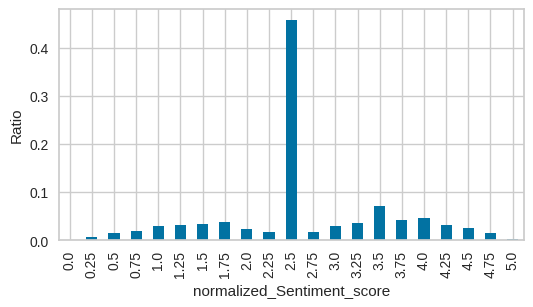

In [32]:
plot_labels(df2, label = "normalized_Sentiment_score")

2.2 Functions to produce normalized sentiment score and rating score

Bins the data on 0.25 intervals
Anything from 1.0 is considered bad, will be labelled as 0
In order to bring data from continuous to labels

In [33]:
### this is when the labelling starts


def label_score(row):
    score = row['normalized_Sentiment_score']
    if score < 1.5:
        return 0
    elif score >= 1.5 and score < 2.5:
        return 1
    elif score == 2.5:
        return 2
    elif score >= 2.75 and score < 4.0:
        return 3
    else:  # for 4.0 and lower
        return 4

df2['label'] = df2.apply(label_score, axis=1)


In [34]:
df2.describe()

,Number of Likes,User,Sentiment_Score,normalized_Sentiment_score,label
count,2.298604e+06,2.298604e+06,2.298604e+06,2.298604e+06,2.298604e+06
mean,1.652954e+00,3.426062e+06,5.774529e-02,2.643538e+00,2.119423e+00
std,2.692870e+00,2.237980e+06,3.795128e-01,9.487468e-01,1.103217e+00
min,0.000000e+00,5.000000e+00,-9.980000e-01,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.288624e+06,0.000000e+00,2.500000e+00,2.000000e+00
50%,1.000000e+00,3.494485e+06,0.000000e+00,2.500000e+00,2.000000e+00
75%,2.000000e+00,5.442085e+06,3.182000e-01,3.250000e+00,3.000000e+00
max,1.098000e+03,7.986889e+06,9.986000e-01,5.000000e+00,4.000000e+00


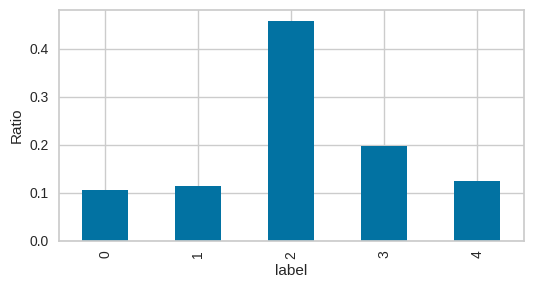

In [35]:
plot_labels(df2, label = "label")

In [36]:
len(df2[df2['label']==3])

454698

In [37]:
df2['label'].value_counts().sort_values()

0     243641
1     262314
4     284702
3     454698
2    1053249
Name: label, dtype: int64

In [38]:
RANDOM_SEED = 42
label_count_0, label_count_1, label_count_4, label_count_3, label_count2 = df2['label'].value_counts().sort_values()

label_0 = df2[df2['label'] == 0]
label_1 = df2[df2['label'] == 1]
label_2 = df2[df2['label'] == 2]
label_3 = df2[df2['label'] == 3]
label_4 = df2[df2['label'] == 4]

print('Bad:', label_0.shape)
print('Nay:', label_1.shape)
print('Average:', label_2.shape)
print('Good:', label_3.shape)
print('Awesome:', label_4.shape)
print('Nay-lowest-count:', label_count_0)

### because label 0 is the lowest:
label_1_under = label_1.sample(label_count_0, random_state = RANDOM_SEED)
label_2_under = label_2.sample(label_count_0, random_state = RANDOM_SEED)
label_3_under = label_3.sample(label_count_0, random_state = RANDOM_SEED)
label_4_under = label_4.sample(label_count_0, random_state = RANDOM_SEED)

cleaned_df = pd.concat([label_0, label_1_under, label_2_under, label_3_under, label_4_under], axis = 0)

Bad: (243641, 12)
Nay: (262314, 12)
Average: (1053249, 12)
Good: (454698, 12)
Awesome: (284702, 12)
Nay-lowest-count: 243641


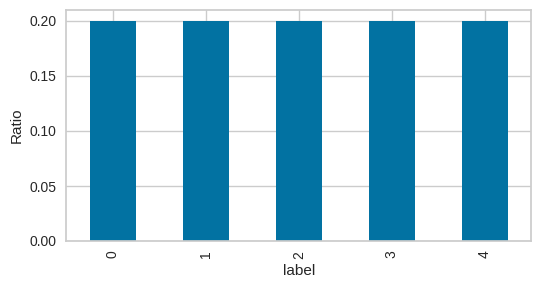

243641
243641
243641
243641
243641


In [39]:
plot_labels(cleaned_df, label = "label")
print(len(cleaned_df[cleaned_df['label']==0]))
print(len(cleaned_df[cleaned_df['label']==1]))
print(len(cleaned_df[cleaned_df['label']==2]))
print(len(cleaned_df[cleaned_df['label']==3]))
print(len(cleaned_df[cleaned_df['label']==4]))

**3. Model building**

Splitting balanced data into df_train, df_dev, df_test

This is an important step of the model development process where data is separated into different subsets to train and evaluate the performance of machine learning models. Objectives:

Function to perform the data split
checks to ensure its balanced

In [40]:

"""
    Splits the dataframe into training, validation and testing sets.

    Args:
        df (pd.DataFrame): The input dataframe.
        fractions (list-like): A list-like object of proportions for the train, validation and test set respectively,
            e.g., for a 60%/20%/20% split, fractions could be [0.6, 0.2, 0.2].
        RANDOM_SEED (int): Seed for the random number generator.

    Returns:
        train_df (pd.DataFrame): The training set.
        val_df (pd.DataFrame): The validation set.
        test_df (pd.DataFrame): The testing set.

    Raises:
        ValueError: If the fractions do not add up to 1.
        ValueError: If the number of instances across all sets do not match the number of instances in the original dataframe."""


fractions = np.array([0.8, 0.1, 0.1])

# The fractions [0.8, 0.1, 0.1] represent the proportions of the dataset that I allocate to training, validation, and testing sets respectively.



def data_split(df, fractions, RANDOM_SEED):

    # shuffling the data:

    ##  this line shuffles the entire DataFrame. This is a crucial step to randomize the order of the samples.
    df = df.sample(frac = 1, random_state = RANDOM_SEED)

    # split into training, validation and testing sets
    ## This function divides the DataFrame into different parts without overlapping, which means once
    ## a sample is allocated to a set (training, validation, or testing), it won't appear in another set.

    # The fractions[:-1].cumsum() * len(df) part calculates the cumulative sum of the fractions (excluding the last one) and then multiplies it by the
    # length of the DataFrame to get the indices at which to split the DataFrame ensuring there is no  overlap!
    train_df, val_df, test_df = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

    if len(train_df) + len(val_df) + len(test_df) != len(df):
        raise ValueError("Number of instances in splits do not match original dataframe")
        print("Check the splitting method please!")
    else:
        return train_df, val_df, test_df

In [41]:
df_train, df_dev, df_test = data_split(cleaned_df, fractions, RANDOM_SEED)

In [42]:
## Checking the data samoples spread in normalized_sentiment_score
df_train["normalized_Sentiment_score"].value_counts(normalize=False)

2.50    195003
4.00     74526
3.50     71553
1.75     66365
1.25     60634
1.50     57700
1.00     53933
4.25     49285
4.50     41559
2.00     41389
3.75     41109
0.75     36021
3.25     35718
3.00     29626
2.25     29625
0.50     27340
4.75     24587
2.75     16944
0.25     14775
5.00      4967
0.00      1905
Name: normalized_Sentiment_score, dtype: int64

In [43]:
## Checking the data samoples spread in normalized_sentiment_score
df_dev["normalized_Sentiment_score"].value_counts(normalize=False)

2.50    24270
4.00     9331
3.50     8798
1.75     8301
1.25     7722
1.50     7187
1.00     6852
4.25     6142
4.50     5293
2.00     5160
3.75     5059
3.25     4512
0.75     4487
2.25     3732
3.00     3731
0.50     3391
4.75     3022
2.75     2169
0.25     1816
5.00      620
0.00      225
Name: normalized_Sentiment_score, dtype: int64

In [44]:
## Checking the data samoples spread in normalized_sentiment_score
df_test["normalized_Sentiment_score"].value_counts(normalize=False)

2.50    24368
4.00     9271
3.50     8961
1.75     8312
1.25     7703
1.50     7076
1.00     6880
4.25     6249
4.50     5217
2.00     5186
3.75     5140
3.25     4450
0.75     4440
3.00     3734
2.25     3608
0.50     3502
4.75     3010
2.75     2137
0.25     1793
5.00      562
0.00      222
Name: normalized_Sentiment_score, dtype: int64

In [45]:
## Checking the data samoples spread within df_train, df_dev, df_test
print(df_train["label"].value_counts(normalize=False))
print(df_dev["label"].value_counts(normalize=False))
print(df_test["label"].value_counts(normalize=False))

1    195079
2    195003
3    194950
4    194924
0    194608
Name: label, dtype: int64
0    24493
4    24408
1    24380
2    24270
3    24269
Name: label, dtype: int64
0    24540
3    24422
2    24368
4    24309
1    24182
Name: label, dtype: int64


(121820, 12)


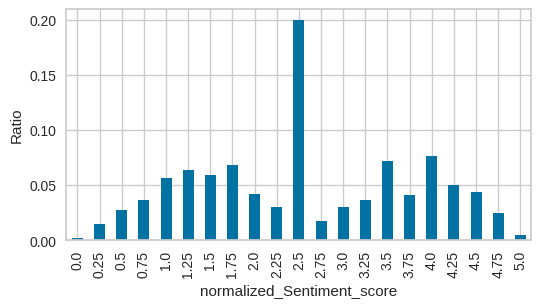

In [46]:
### check shape of df_dev
print(df_dev.shape)
plot_labels(df_dev)

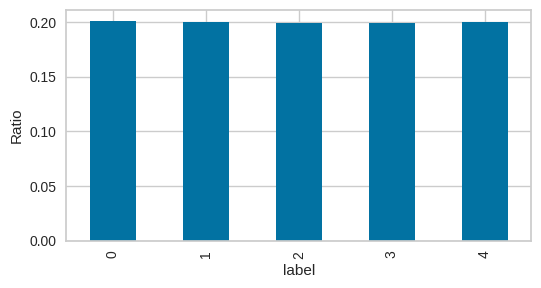

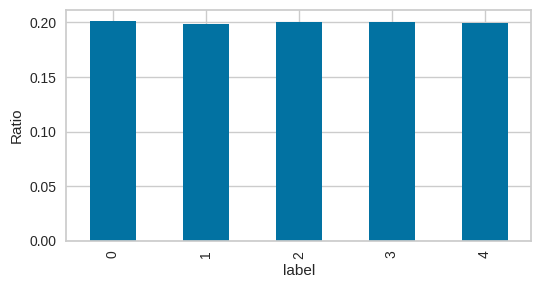

In [47]:
### ensure that its balanced
plot_labels(df_dev, label = 'label')
plot_labels(df_test, label = 'label')

In [48]:
#### store in pickle since its going to be used in numerous modules.

import pickle
drive.mount("/content/drive")

# Path to your Google Drive
drive_path = '/content/drive/My Drive/Model/'

# Serialize the data structures to a file in your Google Drive
with open(drive_path + 'BERT_df_train_dev_test_data', 'wb') as file:
    pickle.dump((df_train, df_dev, df_test), file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 4. Feature Engineering
### Tokenization
In this part, we will tokenize reviews and count numbers of tokens for each review. This information will be useful in BERT model. But we will not use these tokens directly for training models.

In [49]:
from nltk.tokenize import word_tokenize

In [50]:
### testing

ds_temp = df_train["Body"].iloc[:10].map(lambda Body: re.sub(r"[^a-zA-Z0-9' ]", ' ', Body)).map(lambda Body: Body.split())
print(df_train["Body"].iloc[0], '\n', ds_temp.iloc[0])

dollar_tsla if it trade below 160 then i can start to worry..... until then it goes higherrrrrrr 
 ['dollar', 'tsla', 'if', 'it', 'trade', 'below', '160', 'then', 'i', 'can', 'start', 'to', 'worry', 'until', 'then', 'it', 'goes', 'higherrrrrrr']


In [51]:
## following doesn't work because of dates in our data
#%time df_train["tokens"] = df_train["comments2"].map(lambda comments2: re.sub(r"[^a-zA-Z0-9' ]", ' ', comments2)).map(lambda comments2: comments2.split())

import re

# Convert to string before applying the regex substitution and tokenization
%time df_train["tokens"] = df_train["Body"].map(lambda Body: re.sub(r"[^a-zA-Z0-9' ]", ' ', str(Body))).map(lambda Body: Body.split())


CPU times: user 7.1 s, sys: 1.12 s, total: 8.22 s
Wall time: 8.23 s


In [52]:
num_train = df_train.shape[0]
num_review = df2.shape[0]

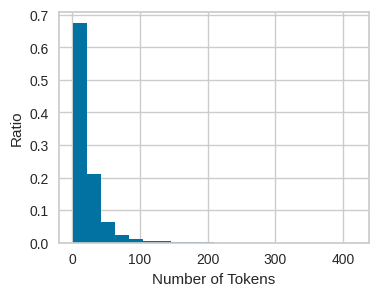

In [53]:
df_train["num_tokens"] = df_train["tokens"].map(len)
ax = df_train["num_tokens"].hist(bins=20,
                                 figsize=(4,3),
                                 weights=np.ones(num_train)/num_train)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.show()

In [54]:
print(len(df_train[df_train["num_tokens"] <= 128]) / len(df_train["num_tokens"]))
print(len(df_train[df_train["num_tokens"] <= 256]) / len(df_train["num_tokens"]))

0.9903926268567277
0.9999979478002471


In [55]:

%time df2["num_tokens"] = df2["Body"].\
map(lambda Body: re.sub(r"[^a-zA-Z0-9' ]", ' ', str(Body))).\
map(lambda Body: len(Body.split()))

CPU times: user 11 s, sys: 292 ms, total: 11.3 s
Wall time: 11.3 s


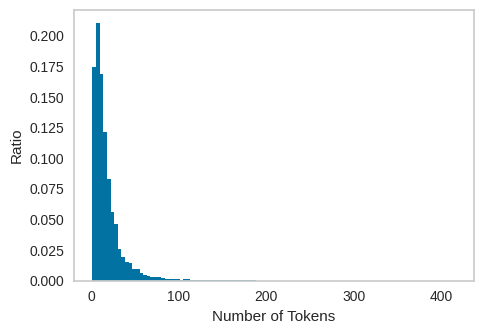

In [56]:
ax = df2["num_tokens"].hist(bins=100,
                                  figsize=(5,3.5),
                                  grid=False,
                                  weights=np.ones(num_review)/num_review)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.savefig("num_tokens.eps")
plt.tight_layout()
plt.show()

In [57]:
print(len(df2[df2["num_tokens"] <= 128]) / len(df2["num_tokens"]))
print(len(df2[df2["num_tokens"] <= 256]) / len(df2["num_tokens"]))

0.9939876551158877
0.9999973897200214


From the result, we can see most reviews are shorter than 256 tokens, which is important for our use later

### Vectorization
We will try following settings for vectorization.

* Word representation: `CountVectorizer` vs. `TfidfVectorizer`
* N-grams: unigram & bigram
* Minimum document frequency: 5
* Convert to lowercase
* Use stop words
* Try binary counter

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def extract_features(df_train, df_dev, df_test):

    # Fill NaN values with an empty string, cos some are empty
    df_train["Body"].fillna("", inplace=True)
    df_dev["Body"].fillna("", inplace=True)
    df_test["Body"].fillna("", inplace=True)

    ### vectorization
    vectorizer = TfidfVectorizer(analyzer='word',
                               stop_words='english',
                               ngram_range=(1, 2),
                               lowercase=True,
                               min_df=5,
                               binary=False)
    X_train = vectorizer.fit_transform(df_train["Body"])
    X_dev = vectorizer.transform(df_dev["Body"])
    X_test = vectorizer.transform(df_test["Body"])
    y_train = df_train["label"].tolist()
    y_dev = df_dev["label"].tolist()
    y_test = df_test["label"].tolist()

    return X_train, X_dev, X_test, y_train, y_dev, y_test

In [59]:
### xtracts features from the provided dataframes (df_train, df_dev, and df_test) and splits them into corresponding feature sets
# (represented by X_train, X_dev, X_test) and labels or target sets (represented by y_train, y_dev, y_test).
%time X_train, X_dev, X_test, y_train, y_dev, y_test = extract_features(df_train, df_dev, df_test)

CPU times: user 50.4 s, sys: 1.36 s, total: 51.7 s
Wall time: 51.8 s


In [60]:
print(X_test.shape)

(121821, 320834)


In [61]:
print(df_test['Body'])

860972                                                                                                                                                                                                                                                                                     dollar_tsla
2509392                                                                                                                                                                                                                                                      dollar_pltr retire by 2030 dollar_pltr!!!
1802910                                                                                                                                                                                                                                                 dollar_emge huge news. dollar_amzn dollar_cowi
98297                                                                                                              

In [62]:
#### store in pickle since its going to be used in numerous modules.

import pickle

# Path to your Google Drive
drive_path = '/content/drive/My Drive/Model/'

# Serialize the data structures to a file in your Google Drive
with open(drive_path + 'train_test_data', 'wb') as file:
    pickle.dump((X_train, X_dev, X_test, y_train, y_dev, y_test), file)


### 5. Traditional machine learning models, such as linear regression, decision trees, and support vector machines
Sde Note --> We want to find a model with highest f1_macro score. Since we feel false negative and false positive matters to us

Created functions for easy chart and table production:

In [63]:
from google.colab import drive
import pickle
## remember to mount drive if you starting from this step without running from start of workbook
drive.mount("/content/drive")

drive_path = '/content/drive/My Drive/Model/'

# Deserialize the data structures from a file in your Google Drive
with open(drive_path + 'train_test_data', 'rb') as file:
    X_train, X_dev, X_test, y_train, y_dev, y_test = pickle.load(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
def evaluate_model(model, model_name="model",
                   y_train_pred=None, y_dev_pred=None, y_test_pred=None):

    evaluate_model_Xy(model, X_train, y_train, label="Training", model_name=model_name)
    evaluate_model_Xy(model, X_dev, y_dev, label="Validation", model_name=model_name)
    evaluate_model_Xy(model, X_test, y_test, label="Testing", model_name=model_name)

In [65]:
def evaluate_model_Xy(model, X, y, y_pred=None, label="Training", model_name="model"):

    if y_pred is None:
        y_pred = model.predict(X)

    print(label + ' Set')
    print("Accuracy:", accuracy_score(y, y_pred))
    print()

    print(classification_report(y, y_pred, digits=4))
    #predictions = clf_lr.predict(X_test)
    #cm = confusion_matrix(y_test, predictions, labels=clf_lr.classes_)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    #                           display_labels=clf_lr.classes_)

    cm = confusion_matrix(y, y_pred, labels=model.classes_, normalize='true')
    labels = {"Bearish": 0, "Nay": 1, "Neutral": 2, "Bullish": 3, "To the Moon!!": 4}.keys()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=labels) #model.classes_

    #disp = plot_confusion_matrix(model, X, y,
    #                           cmap=plt.cm.Blues, normalize='true')

    #plt.savefig(model_name + "_" + label.lower() + ".eps")
    #plt.show()

    disp.plot()
    plt.grid(False)
    plt.show
    print()

### 5.1 Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',
                            tol=1e-4,
                            C=1.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=42,
                            solver='lbfgs',
                            max_iter=100,
                            multi_class='auto',
                            verbose=0,
                            n_jobs=-1)

#clf_lr.fit(X_train, y_train)

In [67]:
clf_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)

In [68]:

lr_dev_preds = clf_lr.predict(X_dev)
lr_f1_dev = f1_score(y_dev, lr_dev_preds, average='macro')
print('dev score :', lr_f1_dev)


lr_test_preds = clf_lr.predict(X_test)
lr_f1_test = f1_score(y_test, lr_test_preds, average='macro')
print('test score :', lr_f1_test)



dev score : 0.7569228278109522
test score : 0.7604199422961164


Training Set
Accuracy: 0.7820481774413994

              precision    recall  f1-score   support

           0     0.8173    0.7708    0.7934    194608
           1     0.7075    0.6867    0.6969    195079
           2     0.8126    0.9433    0.8731    195003
           3     0.7430    0.6858    0.7133    194950
           4     0.8217    0.8236    0.8227    194924

    accuracy                         0.7820    974564
   macro avg     0.7804    0.7820    0.7799    974564
weighted avg     0.7804    0.7820    0.7799    974564


Validation Set
Accuracy: 0.7595222459366278

              precision    recall  f1-score   support

           0     0.8070    0.7518    0.7784     24493
           1     0.6784    0.6606    0.6694     24380
           2     0.7954    0.9356    0.8598     24270
           3     0.7081    0.6478    0.6766     24269
           4     0.7987    0.8020    0.8004     24408

    accuracy                         0.7595    121820
   macro avg     0.7575    0.7596    0.756

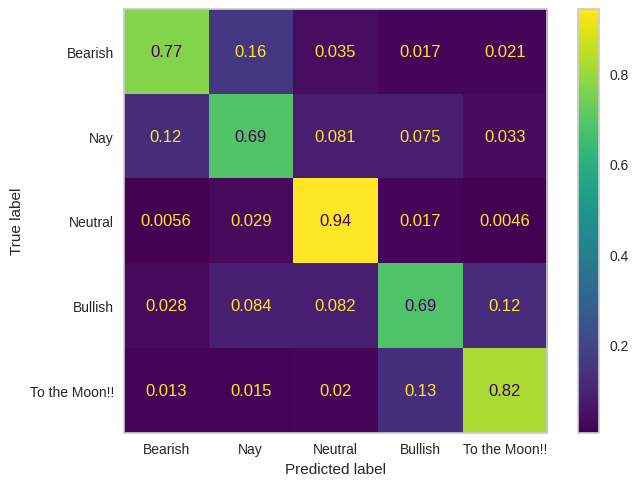

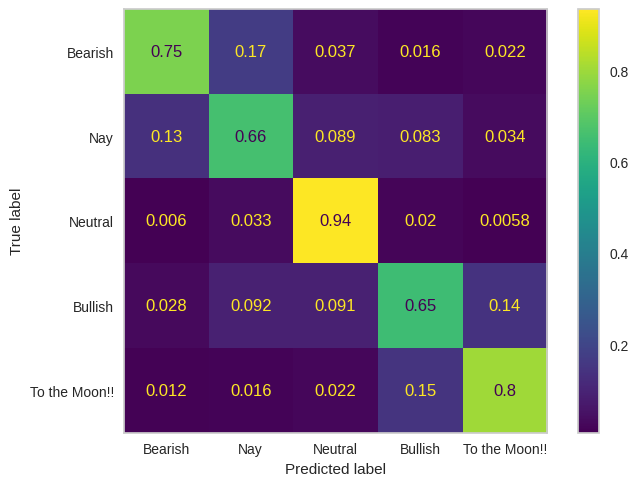

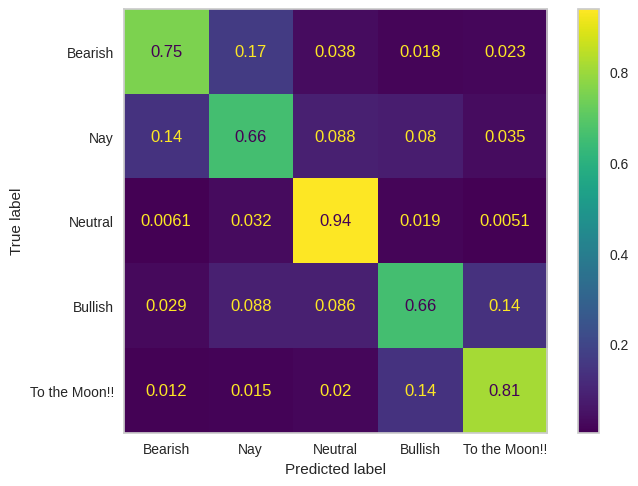

In [69]:
evaluate_model(clf_lr, model_name="lr_count_bin")

### 5.2 Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB(alpha=0.00005,
                       fit_prior=True)

In [71]:
## Train model

%time clf_nb.fit(X_train, y_train)

CPU times: user 590 ms, sys: 27 ms, total: 616 ms
Wall time: 613 ms


MultinomialNB(alpha=5e-05)

Training Set
Accuracy: 0.8195059534314832

              precision    recall  f1-score   support

           0     0.7941    0.8592    0.8254    194608
           1     0.7874    0.7642    0.7756    195079
           2     0.9015    0.8798    0.8905    195003
           3     0.7717    0.7735    0.7726    194950
           4     0.8469    0.8208    0.8337    194924

    accuracy                         0.8195    974564
   macro avg     0.8203    0.8195    0.8196    974564
weighted avg     0.8203    0.8195    0.8196    974564


Validation Set
Accuracy: 0.636726317517649

              precision    recall  f1-score   support

           0     0.6236    0.7042    0.6615     24493
           1     0.5607    0.5493    0.5549     24380
           2     0.8390    0.7180    0.7738     24270
           3     0.5405    0.5402    0.5403     24269
           4     0.6491    0.6715    0.6601     24408

    accuracy                         0.6367    121820
   macro avg     0.6426    0.6366    0.6381

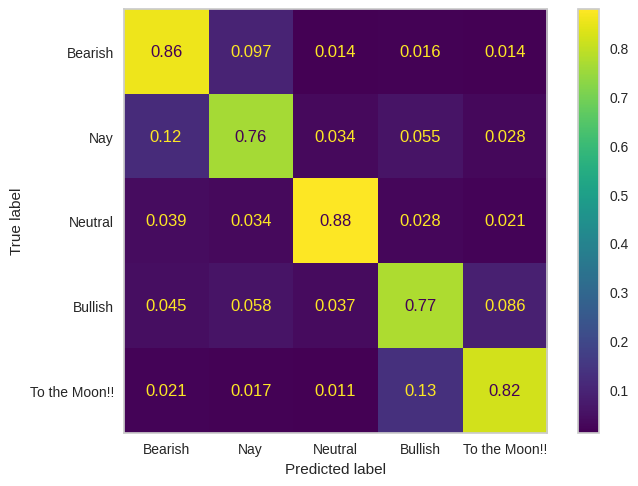

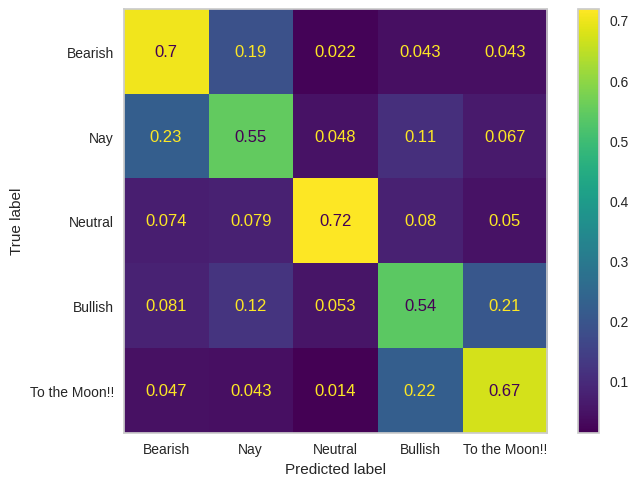

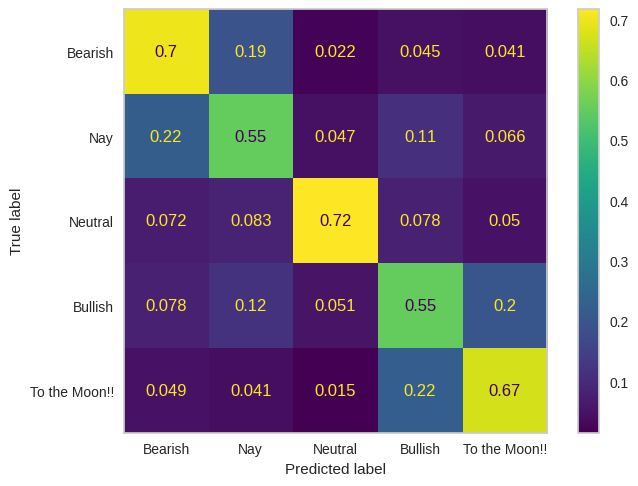

In [72]:
evaluate_model(clf_nb, model_name="nb")


### 5.3 Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=500,
                                criterion="gini",
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=10,
                                #max_features="auto / sqrt",
                                n_jobs=-1,
                                verbose=0,
                                random_state=42,
                                class_weight='balanced')

In [74]:
### takes ard 25 min 27 sec to train.
## take 33 min to train with max features


clf_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=10,
                       n_estimators=500, n_jobs=-1, random_state=42)

Training Set
Accuracy: 0.7158124043161865

              precision    recall  f1-score   support

           0     0.7379    0.7383    0.7381    194608
           1     0.6681    0.5795    0.6206    195079
           2     0.7774    0.8995    0.8340    195003
           3     0.6685    0.5854    0.6242    194950
           4     0.7062    0.7765    0.7397    194924

    accuracy                         0.7158    974564
   macro avg     0.7116    0.7158    0.7113    974564
weighted avg     0.7116    0.7158    0.7113    974564


Validation Set
Accuracy: 0.7017895255294697

              precision    recall  f1-score   support

           0     0.7301    0.7199    0.7250     24493
           1     0.6458    0.5650    0.6027     24380
           2     0.7632    0.8957    0.8241     24270
           3     0.6477    0.5661    0.6041     24269
           4     0.6984    0.7624    0.7290     24408

    accuracy                         0.7018    121820
   macro avg     0.6970    0.7018    0.697

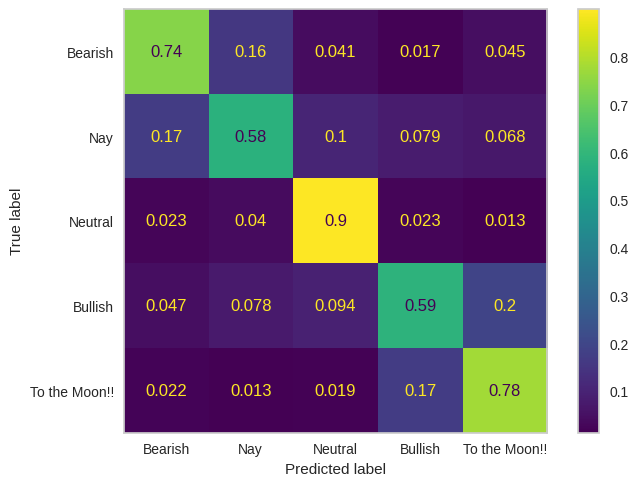

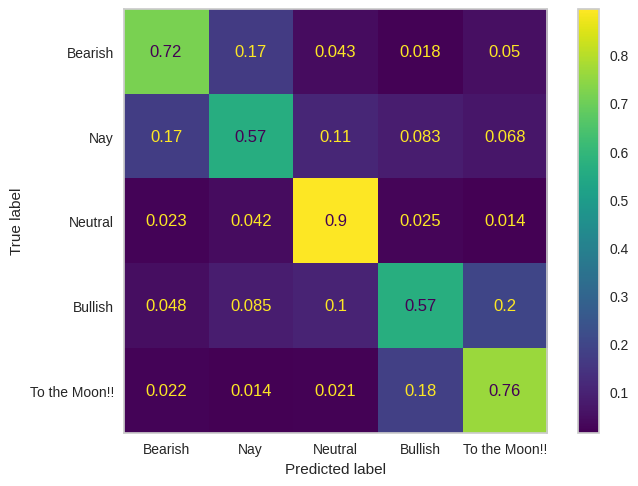

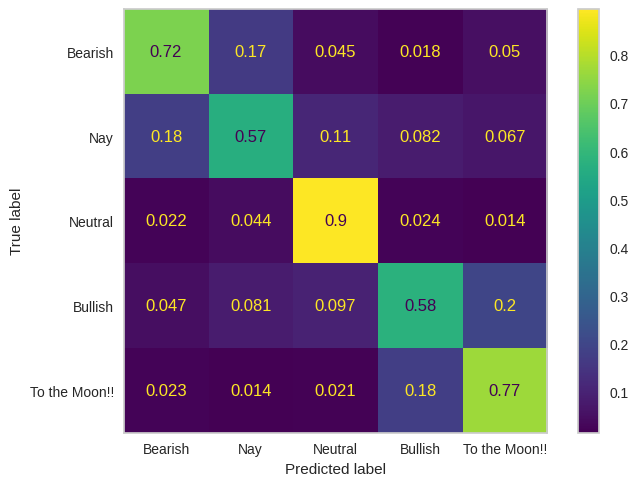

In [75]:
### takes 3 min
evaluate_model(clf_rf, model_name="rf")

### 5.4 Linear Support Vector Machine (SVM)

In [76]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf_sgd = make_pipeline(StandardScaler(with_mean=False),
                        SGDClassifier(loss='hinge',
                                      penalty='l2',
                                      alpha=30,
                                      max_iter=1000,
                                      tol=1e-3,
                                      shuffle=True,
                                      verbose=0,
                                      n_jobs=-1,
                                      random_state=42,
                                      learning_rate='optimal',
                                      early_stopping=True,
                                      class_weight='balanced'))

In [77]:
clf_sgd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('sgdclassifier',
                 SGDClassifier(alpha=30, class_weight='balanced',
                               early_stopping=True, n_jobs=-1,
                               random_state=42))])

Training Set
Accuracy: 0.6967331032133344

              precision    recall  f1-score   support

           0     0.6714    0.8546    0.7520    194608
           1     0.7716    0.5751    0.6590    195079
           2     0.9336    0.5995    0.7301    195003
           3     0.7300    0.5326    0.6159    194950
           4     0.5725    0.9223    0.7065    194924

    accuracy                         0.6967    974564
   macro avg     0.7358    0.6968    0.6927    974564
weighted avg     0.7359    0.6967    0.6927    974564


Validation Set
Accuracy: 0.6009111804301428

              precision    recall  f1-score   support

           0     0.5966    0.7814    0.6766     24493
           1     0.6587    0.4525    0.5365     24380
           2     0.8940    0.5123    0.6514     24270
           3     0.5780    0.3874    0.4639     24269
           4     0.4950    0.8684    0.6306     24408

    accuracy                         0.6009    121820
   macro avg     0.6445    0.6004    0.591

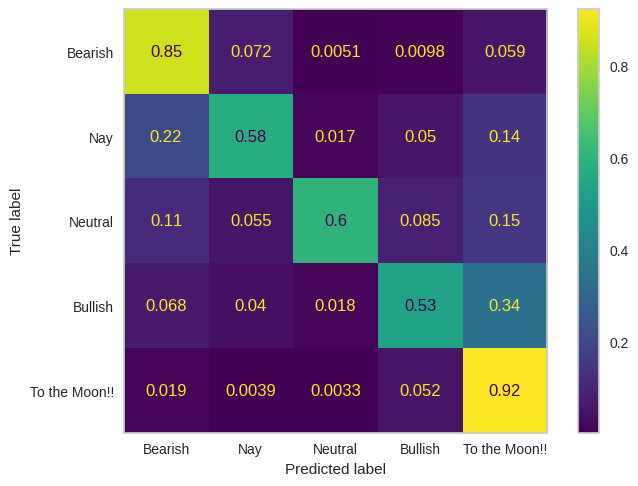

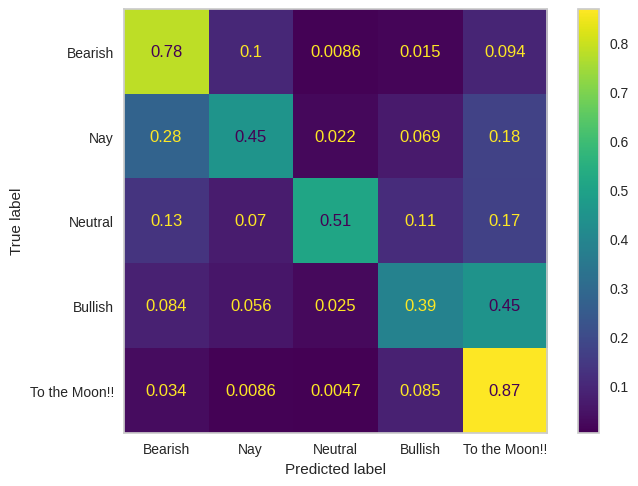

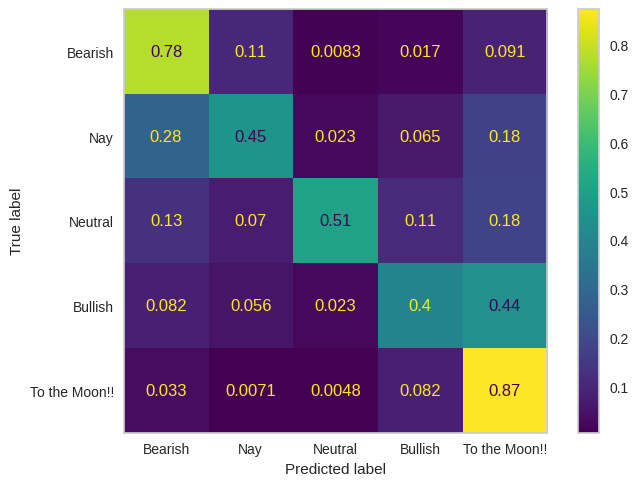

In [78]:
evaluate_model(clf_sgd, model_name="sgd")

## 6. Eavaluate based on accuracy, recall, precision, F1_score

To ensure robustness and avoid overfitting, 10-fold Cross-Validation (CV) was used during the model training phase. By dividing the dataset into 10 parts, training the model on 9 parts, testing it on the remaining part, repeating this process ten times, the results provided a more reliable and generalizable performance metric. End results is an  unbiased model evaluation metrics that provides insight into how well the model would generalize to unseen data.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd

# Set up the cross-validation configuration
kfold = 10  # For 10-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=kfold)

# Create a dictionary to store the accuracy scores of each model
accuracy_scores = {}

# List of models
models = {'Logistic Regression': clf_lr,
          'Naive Bayes': clf_nb,
          'Random Forest Classifier': clf_rf,
          'Linear Support Vector Machine (SVM)': clf_sgd}

# Scoring metrics to consider
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr']

# Initialize a dictionary to store the scores of each model
scores = {}
mean_scores = {}
# Iterate over each model
for name, model in models.items():
    # Initialize a dictionary for the current model
    scores[name] = {}
    mean_scores[name] = {}
    # Compute the cross-validation score for each metric
    for metric in metrics:
        score = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring=metric)
        scores[name][metric] = score
        mean_scores[name][metric] = np.mean(score)

# Convert the dictionary to a DataFrame


df_scores = pd.DataFrame(scores)
mean_df_scores = pd.DataFrame(mean_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 316, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 46, in check
    getattr(self._final_estimator, attr)
  File "/usr/local/lib/python3.1

In [ ]:
df_scores = pd.DataFrame(scores)
mean_df_scores = pd.DataFrame(mean_scores)
df_scores

,Logistic Regression,Naive Bayes,Random Forest Classifier,Linear Support Vector Machine (SVM)
accuracy,"[0.7635572611510718, 0.7599864555650184, 0.7590116666837682, 0.7488636013831741, 0.7691368412411755, 0.7599121654900673, 0.7588347561976687, 0.7550484321129536, 0.7529346576916762, 0.7611024462321457]","[0.6259888976676894, 0.6281334332064398, 0.6263069866710447, 0.6262967257354526, 0.6273600394023969, 0.6262826301099984, 0.6274216056476769, 0.6251641766540798, 0.6257080118207191, 0.623430060745362]","[0.7043619237202048, 0.7036436582287573, 0.7033563520321783, 0.7042490534286916, 0.7049848136594976, 0.7043075849614184, 0.7035790510589394, 0.7046256772286981, 0.7035174848136595, 0.7032301756690199]","[0.5898190997055112, 0.5908862370070903, 0.593441209969525, 0.590383451163077, 0.5911590871778033, 0.5932215563946807, 0.5918773600394024, 0.5909128221966836, 0.592154408143162, 0.6010199474634706]"
precision_weighted,"[0.762091523931925, 0.7575596000433931, 0.7556923194540004, 0.7453897671837104, 0.7660603063033219, 0.7573013238248719, 0.756377773664713, 0.7520193230662137, 0.7502219638636065, 0.7596635519322346]","[0.6337675700226574, 0.6359635858631891, 0.6333479356001844, 0.634094304401687, 0.6348706009296308, 0.6335987769539927, 0.634949840374481, 0.632980307680772, 0.6331862257466626, 0.6307279888728426]","[0.6998970237475503, 0.6990874346243329, 0.6988187013468163, 0.6998057000287006, 0.7006091200762583, 0.699695418783056, 0.6988082489646524, 0.7001922476055794, 0.6988581044660408, 0.6986688158954769]","[0.6425979944488107, 0.6448723880712348, 0.6460113715245674, 0.643192015004304, 0.6467528122921421, 0.6477222357363501, 0.6462549444045118, 0.6467865892561161, 0.6464605009466224, 0.6435822511963717]"
recall_weighted,"[0.7635572611510718, 0.7599864555650184, 0.7590116666837682, 0.7488636013831741, 0.7691368412411755, 0.7599121654900673, 0.7588347561976687, 0.7550484321129536, 0.7529346576916762, 0.7611024462321457]","[0.6259888976676894, 0.6281334332064398, 0.6263069866710447, 0.6262967257354526, 0.6273600394023969, 0.6262826301099984, 0.6274216056476769, 0.6251641766540798, 0.6257080118207191, 0.623430060745362]","[0.7043619237202048, 0.7036436582287573, 0.7033563520321783, 0.7042490534286916, 0.7049848136594976, 0.7043075849614184, 0.7035790510589394, 0.7046256772286981, 0.7035174848136595, 0.7032301756690199]","[0.5898190997055112, 0.5908862370070903, 0.593441209969525, 0.590383451163077, 0.5911590871778033, 0.5932215563946807, 0.5918773600394024, 0.5909128221966836, 0.592154408143162, 0.6010199474634706]"
f1_weighted,"[0.7619789844136668, 0.7566020380196206, 0.7554349899049162, 0.7442598054331606, 0.766217483903894, 0.7565812016691149, 0.7560758692089422, 0.7516357261229951, 0.7502013141634725, 0.7585330680420251]","[0.6275133492855202, 0.6296328231245921, 0.6276609094178094, 0.6277526356178957, 0.6288846503560929, 0.6276684705480933, 0.6290029680367447, 0.62664711841378, 0.6271030294494245, 0.6249537590240373]","[0.6997844524817199, 0.6988812054816962, 0.6984317499230446, 0.6994513995400412, 0.7002296901350631, 0.6994942386846195, 0.6986091587216092, 0.7000155400061782, 0.6987921005999226, 0.6984145265858211]","[0.5769867640220714, 0.5779293835911059, 0.5806995423586878, 0.577080505066033, 0.5787819601063281, 0.5807663008812208, 0.5791171378772497, 0.5785369424674801, 0.5793104907008028, 0.5898348914244302]"
roc_auc_ovr,"[0.9347583370982899, 0.9354244155186203, 0.9334668869443906, 0.9310227552898667, 0.9387122642481351, 0.9353290976135791, 0.9332091690645663, 0.9326117777594511, 0.9314157543083533, 0.9342647501660399]","[0.8379932225575797, 0.838439078691611, 0.8382341109047896, 0.8380739521087899, 0.8373108884170867, 0.8384800001771928, 0.8384690745163764, 0.837359261627341, 0.8374150185111633, 0.8377147931682256]","[0.9069069961266626, 0.9067370551176535, 0.9069243721073352, 0.9069027355899596, 0.9077283126237535, 0.907675556923236, 0.9064685526884636, 0.907659182166442, 0.9070778152764788, 0.9068994891561146]","[na

In [ ]:
mean_df_scores.transpose().round(3)

,accuracy,precision_weighted,recall_weighted,f1_weighted,roc_auc_ovr
Logistic Regression,0.759,0.756,0.759,0.756,0.934
Naive Bayes,0.626,0.634,0.626,0.628,0.838
Random Forest Classifier,0.704,0.699,0.704,0.699,0.907
Linear Support Vector Machine (SVM),0.592,0.645,0.592,0.580,NaN
